<a href="https://colab.research.google.com/github/gustavo-ifusp/exercicios_programacao_usp/blob/main/EP4_calculo_numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numba
from numba import jit 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from tqdm import tqdm 
from matplotlib import pyplot as pl
pl.rc('xtick', labelsize=16)
pl.rc('ytick', labelsize=16)

In [ ]:
print(numba)

<module 'numba' from '/usr/local/lib/python3.6/dist-packages/numba/__init__.py'>


# **Questão 1**

In [ ]:
N = 500
h = 0.01

def f(t,y):
    return y

def fe(t,y,z,h): #Função de Euller
    Td1 = pd.DataFrame(index=['y','z']) 
    Td1.loc[0,'t = %.1f'%t[0]] = z[0]

    for i in range(len(y)-1):
        y[i] = y[i-1] + h*z[i-1]
        z[i] = z[i-1] + h*g(t[i-1],y[i-1],z[i-1]) 
        t[i] = t[i-1] + h 
        Td1.loc['y','t = %.2f'%t[i]] = y[i]
        Td1.loc['z','t = %.2f'%t[i]] = z[i]
    return Td1
     
def RK4(t,y,z,h):

    Td1 = pd.DataFrame(index = ['y','z'])
    Td1.loc['y','t = %.2f'%t[0]] = y[0]
    Td1.loc['z','t = %.2f'%t[0]] = z[0]
    
    for i in range(1,len(y)):  
        k1y = h*z[i-1]
        k1z = h*g(t[i-1], y[i-1], z[i-1])
        k2y = h*(z[i-1]+k1z/2)
        k2z = h*g(t[i-1]+h/2, y[i-1]+k1y/2, z[i-1]+k1z/2)
        k3y = h*(z[i-1]+k2z/2)
        k3z = h*g(t[i-1]+h/2, y[i-1]+k2y/2, z[i-1]+k2z/2)
        k4y = h*(z[i-1]+k3z)
        k4z = h*g(t[i-1]+h, y[i-1]+k3y, z[i-1]+k3z)
        y[i] = y[i-1] + (k1y+2*(k2y+k3y)+k4y)/6 
        z[i] = z[i-1] + (k1z+2*(k2z+k3z)+k4z)/6
        t[i] = t[i-1] + h
        Td1.loc['y','t = %.2f'%t[i]] = y[i]
        Td1.loc['z','t = %.2f'%t[i]] = z[i]
    return Td1

def g(t,y,z):
    return 12*(t**2)+4*(t**3)-(t**4)+y-z 
  

In [ ]:
t = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
z[0] = 0
t[0] = 0
y[0] = 0
u = fe(t,y,z,h)
Td1 = RK4(t,y,z,h)

In [ ]:
len(Td1.columns)

500

In [ ]:
len(u.columns)

500

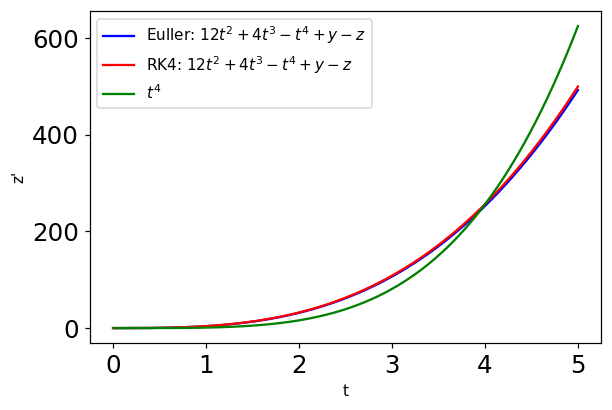

In [ ]:
plt.figure(figsize = (6,4), dpi = 110)
aj = r'$12t^2+4t^3-t^4+y-z$'
plt.plot(np.linspace(0,5,500),u.loc['z'], label = 'Euller: '+aj, color = 'blue')
plt.plot(np.linspace(0,5,500),Td1.loc['z'],label = 'RK4: '+aj, color = 'red')
t4 = r'$t^4$'
plt.plot(t,t**4, label = t4, color = 'green')
plt.xlabel('t')
plt.ylabel ('z\'')
plt.legend()
plt.show()

# **Questão 2**

In [ ]:
pl.rcParams['figure.figsize'] = (8, 6)
y_prec = lambda t: t**4
z_prec= lambda t: 4*t**3
h=0.01
tfim = 5.
b = lambda t,y,z: 12*(t**2)+4*(t**3)-(t**4)+y-z 
t=0 #condições inciais
y=0
z=0
td2 = Table(names=('t', 'y', 'z'), dtype=('f2', 'f4', 'f4'))

In [ ]:
def fe2(t, y, z, tfim, h): #Função de Euller
    while t < tfim: # Laço para ir prenchendo a tabela sob a condição
        td2.add_row((t, y, z)) 
        z = z + h*b(t,y,z)
        t = t + h
        y = y + h*z
    erro_relativo_y = abs((y - y_prec(t))/y_prec(t))
    erro_relativo_z = abs((z - z_prec(t))/z_prec(t))
    print("Encontramos a solução para t = %.2f y(%.2f) = %.4f e z(%.2f) = y'(%.2f) = %.4f"%(td2['t'][-1],td2['t'][-1], td2['y'][-1], td2['t'][-1], td2['t'][-1], td2['z'][-1]))
    print("\n O erro relativo para y é err_y = %.4f e para z é err_z = %.4f"%(erro_relativo_y, erro_relativo_z))
    return td2

In [ ]:
s = fe2(t, y, z, tfim, h)

Encontramos a solução para t = 5.00 y(5.00) = 627.6572 e z(5.00) = y'(5.00) = 500.8642

 O erro relativo para y é err_y = 0.0043 e para z é err_z = 0.0017


In [ ]:
s

t,y,z
float16,float32,float32
0.0,0.0,0.0
0.01,0.0,0.0
0.02,1.20399e-07,1.20399e-05
0.03,7.2279005e-07,6.0239105e-05
0.04,2.4099484e-06,0.00016871584
0.05,6.0258203e-06,0.00036158718
0.06,1.2655511e-05,0.0006629691
0.07,2.3625274e-05,0.0010969763
0.08,4.0502502e-05,0.0016877227


In [ ]:
t=0
y=0
z=0

In [ ]:
td3 = Table(names=('t', 'y', 'z'), dtype=('f2', 'f4', 'f4')) 

In [ ]:
def RK4(t, y, z, tfim, h):
    while(t <= tfim):
        td3.add_row((t, y, z)) 
        k1y = h*z
        k1z = h*b(t,y,z)
        k2y = h*(z + k1z/2)
        k2z = h*b(t + h/2, y + k1y/2,z + k1z/2)
        k3y = h*(z + k2z/2)
        k3z = h*g(t + h/2, y + k2y/2,z + k2z/2)
        k4y = h*(z + k3z)
        k4z = h*g(t + h, y + k3y,z + k3z)
        t = t + h
        y = y + (k1y + 2*k2y + 2*k3y + k4y)/6
        z = z + (k1z + 2*k2z + 2*k3z + k4z)/6
    
    erro_relativo3_y = abs((y - y_prec(t))/y_prec(t))
    erro_relativo3_z = abs((z - z_prec(t))/z_prec(t))
    print("Encontramos a solução para t = %.2f é y(%.2f) = %.6f e z(%.2f) = y'(%.2f) = %.6f"%(td2['t'][-1], td2['t'][-1], td2['y'][-1], td2['t'][-1], td2['t'][-1], td2['z'][-1]))
    print("\n O erro relativo para y é err_y = %.6f e para z é err_z = %.6f"%(erro_relativo3_y, erro_relativo3_z))
    return td3

In [ ]:
s = RK4(t, y, z, tfim, h)

Encontramos a solução para t = 5.00 é y(5.00) = 627.657227 e z(5.00) = y'(5.00) = 500.864197

 O erro relativo para y é err_y = 0.000000 e para z é err_z = 0.000000


In [ ]:
s

t,y,z
float16,float32,float32
0.0,0.0,0.0
0.01,9.991604e-09,4.0000127e-06
0.02,1.5998292e-07,3.2000025e-05
0.03,8.099739e-07,0.00010800004
0.04,2.5599647e-06,0.00025600006
0.05,6.2499553e-06,0.0005000001
0.06,1.2959946e-05,0.00086400006
0.07,2.4009936e-05,0.0013720001
0.08,4.0959923e-05,0.0020480002


In [ ]:
h=0.01
tfim = 5.
b = lambda t, x, v: 1/2 * x * (1 - x**2)
t=0
x=1
v=[-0.1, -0.5, -1.0]

In [ ]:
 td4 = Table(names=('t', 'x', 'v'), dtype=('f2', 'f4', 'f4')) 

NameError: ignored

In [ ]:
def RK4(t, x, v, n, h, b):
    T=[]
    X=[]
    V=[]
    for i in range(n):
        T.append(t)
        X.append(x)
        V.append(v)
        k1x = h*v
        k1v = h*b(t,x,v)
        k2x = h*(v + k1v/2)
        k2v = h*b(t + h/2, x + k1x/2,v + k1v/2)
        k3x = h*(v + k2v/2)
        k3v = h*b(t + h/2, x + k2x/2,v + k2v/2)
        k4x = h*(v + k3v)
        k4v = h*b(t + h, x + k3x,v + k3v)
        t = t + h
        x = x + (k1x + 2*k2x + 2*k3x + k4x)/6
        v = v + (k1v + 2*k2v + 2*k3v + k4v)/6
    return T, X, V

In [ ]:
s=[]
for element in v:
    s.append(RK4(t, x, element, 10000, h, g))

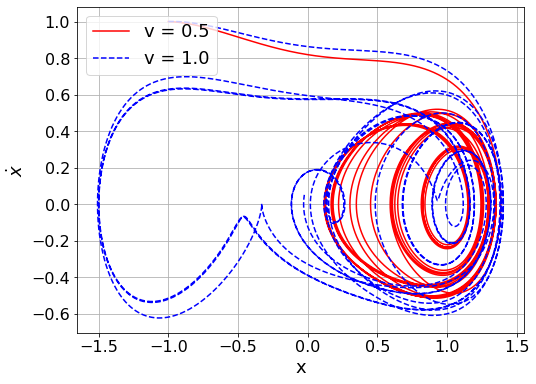

In [ ]:
pl.plot(s[1][1], s[1][2], label='v = 0.5', color = 'red')
pl.plot(s[2][1], s[2][2], '--', label='v = 1.0', color = 'blue')
pl.xlabel(r'x', fontsize=18)
pl.ylabel(r'$\dot{x}$', fontsize=18)
pl.legend(fontsize=18)
pl.grid()

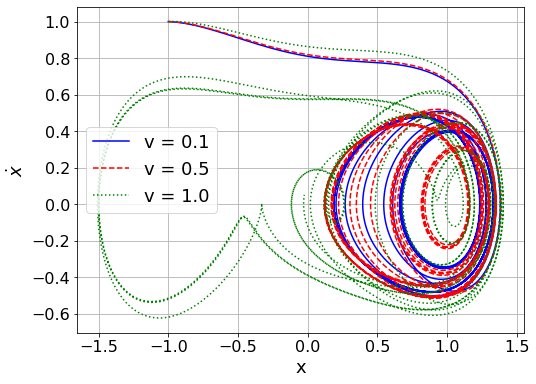

In [ ]:
pl.plot(s[0][1], s[0][2], '-', label='v = 0.1', color = 'blue')
pl.plot(s[1][1], s[1][2], '--', label='v = 0.5', color = 'red')
pl.plot(s[2][1], s[2][2], ':', label='v = 1.0', color = 'green')
pl.xlabel(r'x', fontsize=18)
pl.ylabel(r'$\dot{x}$', fontsize=18)
pl.legend(fontsize=18)
pl.grid()

In [ ]:
dois_gama = [0.25, 0.8]
x=-1
v=1
t=0

In [ ]:
s = []
for element in dois_gama:
    b = lambda t, x, v: 1/2 * x * (1-x**2) - element*v
    s.append(RK4(t, x, v, 10000, h, b))

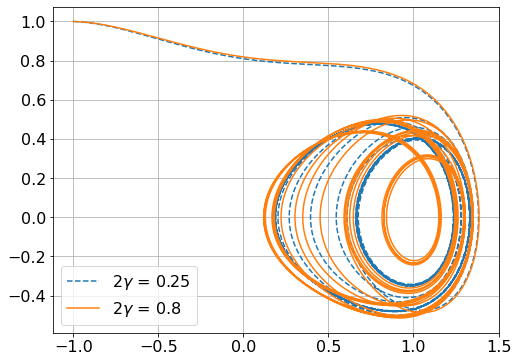

In [ ]:
pl.plot(s[0][1], s[0][2], '--', label=r'$2\gamma$ = 0.25')
pl.plot(s[1][1], s[1][2], label=r'$2\gamma$ = 0.8')
pl.legend(fontsize =16)
pl.grid()

In [ ]:
F = [0.22, 0.23, 0.28, 0.25, 0.6]
t=0
h=0.001*2*np.pi
q=1

In [ ]:
s = []
for element in F:
    b = lambda t, x, v: 1/2 * x * (1-x**2) - 0.25*v + element*np.cos(q*t)
    s.append(RK4(t, x, v, 21000, h, b))

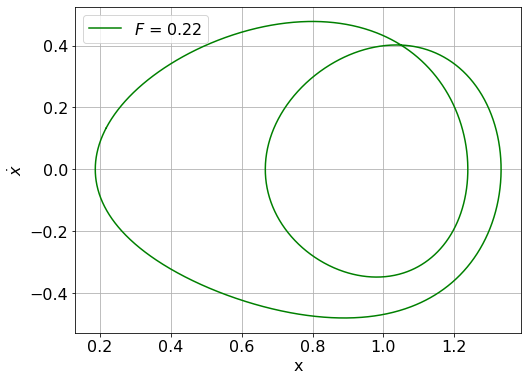

In [ ]:
pl.plot(s[0][1][18999:-1], s[0][2][18999:-1], label=r'$F$ = 0.22', color = 'green') 
pl.xlabel(r'x', fontsize=16)
pl.ylabel(r'$\dot{x}$', fontsize=16)
pl.legend(fontsize=16)
pl.grid()

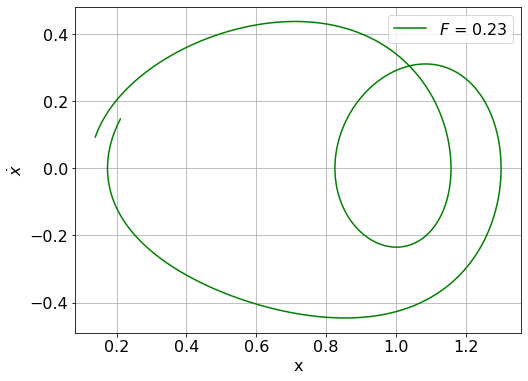

In [ ]:
pl.plot(s[1][1][18999:-1], s[1][2][18999:-1], label=r'$F$ = 0.23', color = 'green')
pl.xlabel(r'x', fontsize=16)
pl.ylabel(r'$\dot{x}$', fontsize=16)
pl.legend(fontsize=16)
pl.grid()

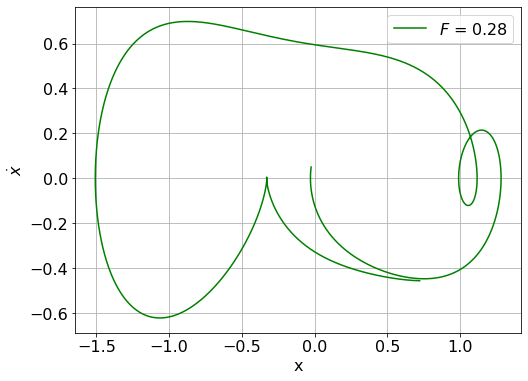

In [ ]:
pl.plot(s[2][1][17499:-1], s[2][2][17499:-1], label=r'$F$ = 0.28', color = 'green')
pl.xlabel(r'x', fontsize=16)
pl.ylabel(r'$\dot{x}$', fontsize=16)
pl.legend(fontsize=16)
pl.grid()

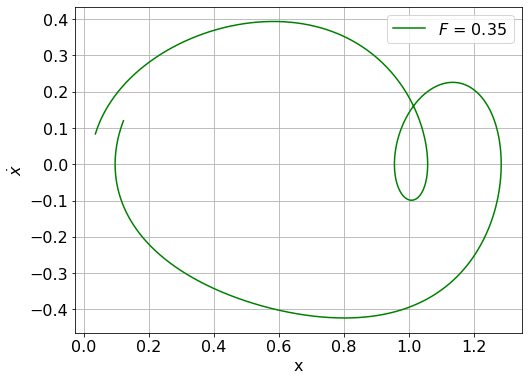

In [ ]:
pl.plot(s[3][1][18999:-1], s[3][2][18999:-1], label=r'$F$ = 0.35', color = 'green')
pl.xlabel(r'x', fontsize=16)
pl.ylabel(r'$\dot{x}$', fontsize=16)
pl.legend(fontsize=16)
pl.grid()

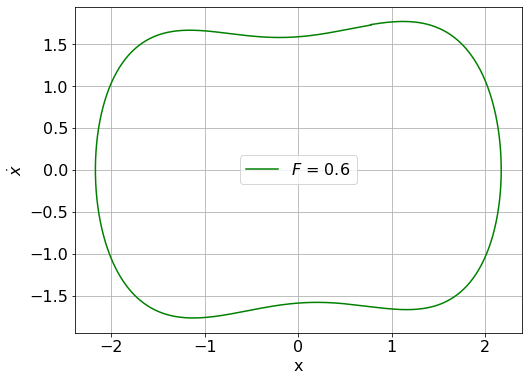

In [ ]:
pl.plot(s[4][1][19999:-1], s[4][2][19999:-1], label=r'$F$ = 0.6', color = 'green')
pl.xlabel(r'x', fontsize=16)
pl.ylabel(r'$\dot{x}$', fontsize=16)
pl.legend(fontsize=16)
pl.grid()

In [ ]:
xp=[]
fp=[]
for F in tqdm(np.arange(0., 0.7, 0.0005)):
    t = 0
    x = -1
    v = 1
    q = 1
    h = 0.01*2*np.pi/q
    b = lambda t, x, v: 1/2 * x * (1-x**2) - 0.25*v + F*np.cos(q*t)
    Tt, Xt, Vt = RK4(t, x, v, 200000, h, b) 
    h = 0.001*np.pi/q                                                       
    t = Tt[-1]
    x = Xt[-1]
    v = Vt[-1]
    for i in range(100):
        T, X, V = RK4(t, x, v, 1000, h, b)
        t = T[-1]
        x = X[-1]
        v = V[-1]
        xp.append(x)
        fp.append(F)

100%|██████████| 1400/1400 [2:00:01<00:00,  5.14s/it]


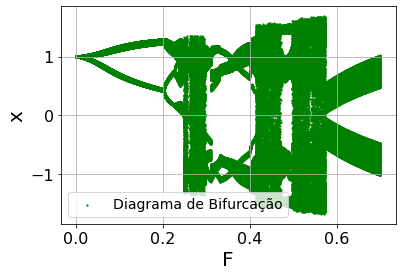

In [ ]:
pl.scatter(fp, xp, s=1.5, label='Diagrama de Bifurcação', color = 'green')
pl.xlabel(r'F', fontsize=20)
pl.ylabel(r'x', fontsize=20)
pl.legend(fontsize=14)
pl.grid()

# **Questão 3**

In [ ]:
xp2 = []
vp2 = []
F = 0.28
t=0
x=-1
v=1
q=1
h=0.01*2*np.pi/q
b = lambda t, x, v: 1/2 * x * (1-x**2) - 0.25*v + F*np.cos(q*t)
Tt, Xt, Vt = RK4(t, x, v, 200000, h, b) 
h=0.001*np.pi/q                                                       
t=Tt[-1]
x=Xt[-1]
v=Vt[-1]
for i in tqdm(range(20000)):
    T, X, V = RK4(t, x, v, 1000, h, b) 
    t = T[-1]
    x = X[-1]
    v = V[-1]
    xp2.append(x)
    vp2.append(v)

100%|██████████| 20000/20000 [06:20<00:00, 52.52it/s]


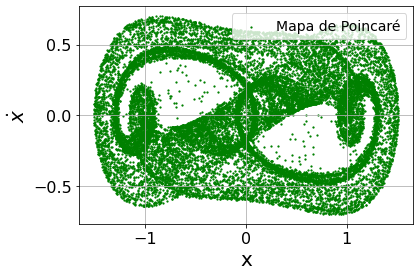

In [ ]:
pl.scatter(xp2, vp2, s=1.5, label='Mapa de Poincaré', color = 'green')
pl.xlabel(r'x', fontsize=20)
pl.ylabel(r'$\dot{x}$', fontsize=20)
pl.legend(fontsize=14)
pl.grid()